In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [3]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255


In [4]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir="./logs")
with tensorflow.device('/cpu:0'):
    history = model.fit(train_X, train_Y, batch_size=32, validation_split=0.2,epochs=20, callbacks=tensorboard_callback)

Epoch 1/20
   1/1500 [..............................] - ETA: 0s - loss: 2.2467 - accuracy: 0.0938WARNING:tensorflow:From /home/tony/.virtualenvs/TF2/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2282 - accuracy: 0.9281 - val_loss: 0.0610 - val_accuracy: 0.9822
Epoch 2/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0906 - accuracy: 0.9733 - val_loss: 0.0545 - val_accuracy: 0.9844
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0709 - accuracy: 0.9779 - val_loss: 0.0466 - val_accuracy: 0.9871
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0426 - val_accuracy: 0.9876
Epoch 5/20
1500/1500 [=================

In [7]:
with tensorflow.device('/cpu:0'):
    model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0286 - accuracy: 0.9911


In [8]:
model.save('./model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model/assets


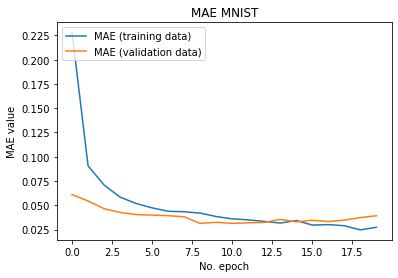

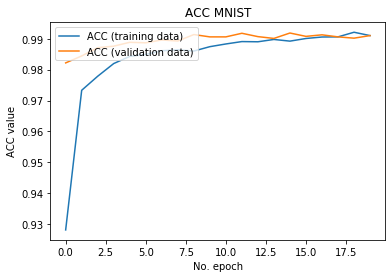

In [9]:
# Plot history: MAE: Mean Absolute Error
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE MNIST')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Plot history: ACC: MAccuracy
plt.plot(history.history['accuracy'], label='ACC (training data)')
plt.plot(history.history['val_accuracy'], label='ACC (validation data)')
plt.title('ACC MNIST')
plt.ylabel('ACC value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

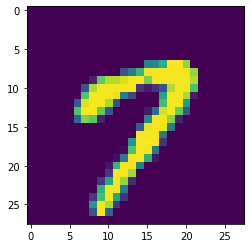

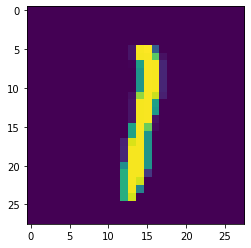

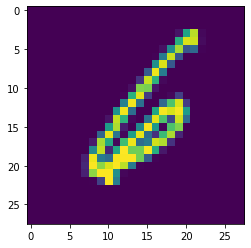

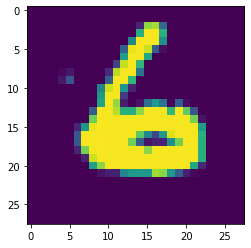

In [10]:
sample_ims = [15, 838, 939, 2789]
to_predict = []
# Generate plots for samples
for smp in sample_ims:
  # Generate a plot
  im = train_X[smp].reshape((28, 28))
  plt.imshow(im)
  plt.show()
  # Add sample to array for prediction
  to_predict.append(train_X[smp]) 

In [12]:
to_predict = np.array(to_predict)
#print(to_predict.shape)
predictions = model.predict(to_predict)
#print(predictions)
digits = np.argmax(predictions, axis = 1)
print(digits)

[7 1 6 6]
